In [28]:
import random
random.seed(10)
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Part One

In [29]:
data = pd.read_csv('bike_share_hour.csv')
data['holiday'] = data['holiday'].astype('category')
data['season'] = data['season'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')
data.head() #Convert categorical variables to pandas category type

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
data.isna().sum() #Every value is non-null

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

C:\Users\jaram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

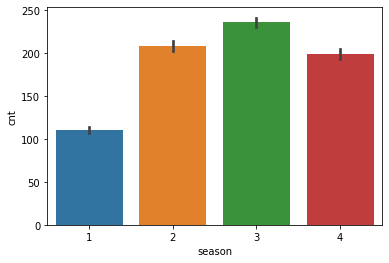

In [31]:
data.describe()
sns.barplot('season', 'cnt', data = data)
#It looks like spring has the least riders, and fall has the most

C:\Users\jaram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

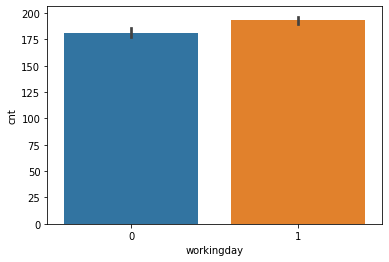

In [32]:
sns.barplot('workingday', 'cnt', data = data)
#It seems like people tend to ride more often on their days off, but not by much

C:\Users\jaram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

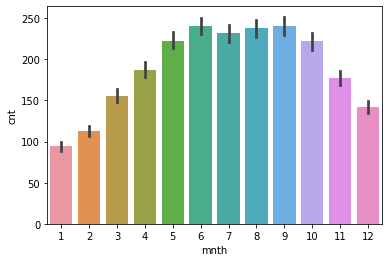

In [33]:
sns.barplot('mnth', 'cnt', data = data)
#Months 5-10 have the most riders

In [34]:
def get_seasons(df):
    month = df[0]
    season = df[1]
    for i in range(1, 13):
        if month == i:
            return(i, season)
        
    
    
        
    

    
    

seasons=data[['mnth','season']].apply(get_seasons,axis=1)

seasons.unique()#Still two values in the embarked column, so we drop them 

    

array([(1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (5, 2), (6, 2), (6, 3),
       (7, 3), (8, 3), (9, 3), (9, 4), (10, 4), (11, 4), (12, 4), (12, 1)],
      dtype=object)

Spring: Monthes 12-3 <br>
Summer: Monthes 3-6<br>
Fall: Monthes 6-9<br>
Winter: Monthes 9-12

C:\Users\jaram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

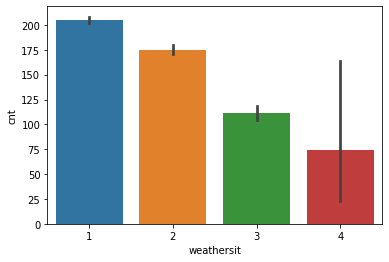

In [35]:
sns.barplot('weathersit', 'cnt', data = data)
#People tend to ride more when the weather is nicer

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

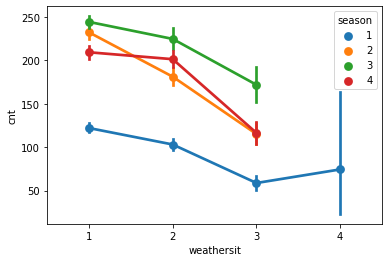

In [36]:
sns.pointplot(x='weathersit', y='cnt', hue='season', data = data)
#Rider overall count seems to decrease as the weather gets worse, regardless of the season

C:\Users\jaram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

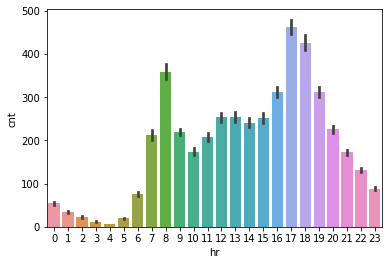

In [37]:
sns.barplot('hr', 'cnt', data = data)
#8am, 5pm, and 6 pm are the busiest hours

C:\Users\jaram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

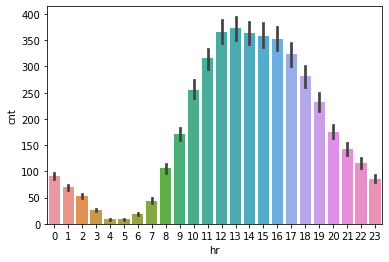

In [38]:
off_days = data.query('workingday == 0')
sns.barplot('hr', 'cnt', data = off_days)

On The weekends, we get an increase in count for the hours people would normally be working (9am to 5 pm)

## Part Two

<AxesSubplot:>

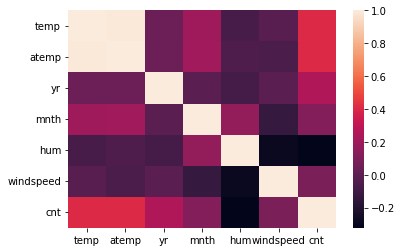

In [39]:

data_num = data[['temp', 'atemp', 'yr', 'mnth', 'hum', 'windspeed', 'cnt']]

corr = data_num.corr()
sns.heatmap(corr)

Based on the above heatmap, there is some correlation between the temperature and the count. There is a very obvious one between registered and count, but that doesn't really tell us anything new. It just means most riders register

In [40]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
data_cat = data[['holiday', 'workingday', 'weathersit', 'season']]
data_num = data[['temp', 'atemp', 'yr', 'mnth', 'hum', 'windspeed', 'cnt']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_num)


In [42]:
scaled_data = pd.DataFrame(scaled_data, columns=list(data_num))

scaled_data

,temp,atemp,yr,mnth,hum,windspeed,cnt
0,-1.334648,-1.093281,-1.005134,-1.610438,0.947372,-1.553889,-0.956339
1,-1.438516,-1.181732,-1.005134,-1.610438,0.895539,-1.553889,-0.824022
2,-1.438516,-1.181732,-1.005134,-1.610438,0.895539,-1.553889,-0.868128
3,-1.334648,-1.093281,-1.005134,-1.610438,0.636370,-1.553889,-0.972879
4,-1.334648,-1.093281,-1.005134,-1.610438,0.636370,-1.553889,-1.039037
...,...,...,...,...,...,...,...
17374,-1.230779,-1.269602,0.994892,1.588467,-0.141137,-0.211691,-0.388478
17375,-1.230779,-1.269602,0.994892,1.588467,-0.141137,-0.211691,-0.553875
17376,-1.230779,-1.269602,0.994892,1.588467,-0.141137,-0.211691,-0.548361
17377,-1.230779,-1.181732,0.994892,1.588467,-0.348473,-0.456099,-0.708245


<AxesSubplot:xlabel='cnt', ylabel='Count'>

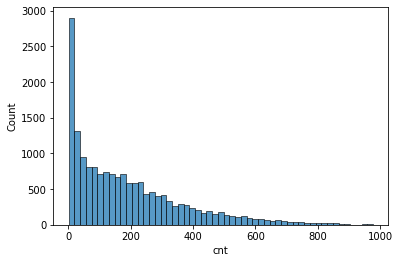

In [43]:
sns.histplot(data['cnt'])

The histogram tells us that way more often then not, there are less then about 100 riders in a given day

In [44]:
data_cat = data[['holiday', 'workingday', 'weathersit', 'season']]
scaled_data[['holiday', 'workingday', 'weathersit', 'season']] = data_cat[['holiday', 'workingday', 'weathersit', 'season']]
scaled_data #After scaling, combine back into one dataset
scaled_data.to_csv('prepared_bike.csv')

In [247]:
X=scaled_data.drop('cnt',axis=1) 
y=scaled_data['cnt'].copy()


train_feature, test_feature, train_target, test_target = train_test_split(X, y, test_size=0.33) #Split data into test and training sets

In [248]:
lin_reg = linear_model.LinearRegression()

lin_reg.fit(train_feature, train_target)
pred = lin_reg.predict(test_feature) #Produce predictions with test features

from sklearn.model_selection import cross_validate
scores = cross_validate(lin_reg, X, y, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print('R2: ', scores['train_r2'])
print('MSE ', np.mean(-scores['train_neg_mean_squared_error']))
print('RMSE ', np.mean(np.sqrt(-scores['train_neg_mean_squared_error']))) 

R2:  [0.28264772 0.33474882 0.31294087 0.31495012 0.31295519]
MSE  0.683876802495238
RMSE  0.8252488034102642


## Part 3

In [249]:
#Create dummies, add them to df, drop original categories 
holiday=pd.get_dummies(data['holiday'],drop_first=True, prefix='holiday_') 
workingday=pd.get_dummies(data['workingday'],drop_first=True, prefix='workingday_')
weathersit=pd.get_dummies(data['weathersit'], prefix='weathersit_')
season=pd.get_dummies(data['season'], prefix='season_')

scaled_data = pd.merge(
    left=scaled_data ,
    right=holiday,
    left_index=True,
    right_index=True,
)
scaled_data = pd.merge(
    left=scaled_data ,
    right=workingday,
    left_index=True,
    right_index=True,
)
scaled_data = pd.merge(
    left=scaled_data ,
    right=weathersit,
    left_index=True,
    right_index=True,
)
scaled_data = pd.merge(
    left=scaled_data ,
    right=season,
    left_index=True,
    right_index=True,
)
scaled_data = scaled_data.drop(columns=['holiday', 'workingday', 'weathersit', 'season'])
scaled_data

,temp,atemp,yr,mnth,hum,windspeed,cnt,holiday__1,workingday__1,weathersit__1,weathersit__2,weathersit__3,weathersit__4,season__1,season__2,season__3,season__4
0,-1.334648,-1.093281,-1.005134,-1.610438,0.947372,-1.553889,-0.956339,0,0,1,0,0,0,1,0,0,0
1,-1.438516,-1.181732,-1.005134,-1.610438,0.895539,-1.553889,-0.824022,0,0,1,0,0,0,1,0,0,0
2,-1.438516,-1.181732,-1.005134,-1.610438,0.895539,-1.553889,-0.868128,0,0,1,0,0,0,1,0,0,0
3,-1.334648,-1.093281,-1.005134,-1.610438,0.636370,-1.553889,-0.972879,0,0,1,0,0,0,1,0,0,0
4,-1.334648,-1.093281,-1.005134,-1.610438,0.636370,-1.553889,-1.039037,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.230779,-1.269602,0.994892,1.588467,-0.141137,-0.211691,-0.388478,0,1,0,1,0,0,1,0,0,0
17375,-1.230779,-1.269602,0.994892,1.588467,-0.141137,-0.211691,-0.553875,0,1,0,1,0,0,1,0,0,0
17376,-1.230779,-1.269602,0.994892,1.588467,-0.141137,-0.211691,-0.548361,0,1,1,0,0,0,1,0,0,0
17377,-1.230779,-1.181732,0.994892,1.588467,-0.348473,-0.456099,-0.708245,0,1,1,0,0,0,1,0,0,0


In [250]:
X=scaled_data.drop('cnt',axis=1) 
y=scaled_data['cnt'].copy()


train_feature, test_feature, train_target, test_target = train_test_split(X, y, test_size=0.33) #Split data into test and training sets

lin_reg = linear_model.LinearRegression()

lin_reg.fit(train_feature, train_target)
pred = lin_reg.predict(test_feature) #same process as above


scores = cross_validate(lin_reg, X, y, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print('R2: ', scores['train_r2'])
print('MSE ', np.mean(-scores['train_neg_mean_squared_error']))
print('RMSE ', np.mean(np.sqrt(-scores['train_neg_mean_squared_error']))) 

R2:  [0.29933034 0.34666689 0.32797967 0.32347267 0.33186217]
MSE  0.6697014163590714
RMSE  0.8166745078243268


Our MSE/RMSE improved as a result of the scaling and the one hot encoding

In [264]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(train_feature, train_target)

scores = cross_validate(dt_reg, X, y, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print('R2: ', np.mean(scores['train_r2']))
print('MSE ', np.mean(-scores['train_neg_mean_squared_error']))
print('RMSE ', np.mean(np.sqrt(-scores['train_neg_mean_squared_error'])))

R2:  0.9486120003951803
MSE  0.051211905375192754
RMSE  0.2256070941313501


In [265]:
#Train and Score Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0, n_estimators=30)
rf_reg.fit(train_feature, train_target)
pred = rf_reg.predict(test_feature) 


scores = cross_validate(rf_reg, X, y, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print('R2: ', np.mean(scores['train_r2']))
print('MSE ', np.mean(-scores['train_neg_mean_squared_error']))
print('RMSE ', np.mean(np.sqrt(-scores['train_neg_mean_squared_error']))) 

R2:  0.878301760355721
MSE  0.12109521685839905
RMSE  0.34709024132882116


In [254]:
#SGD 
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(train_feature, train_label)
pred = sgd_reg.predict(test_feature) 


scores = cross_validate(sgd_reg, X, y, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print('R2: ', scores['train_r2'])
print('MSE ', np.mean(-scores['train_neg_mean_squared_error']))
print('RMSE ', np.mean(np.sqrt(-scores['train_neg_mean_squared_error']))) 

R2:  [0.2978383  0.34612482 0.32531915 0.32220108 0.32968047]
MSE  0.6713146585957355
RMSE  0.8176580299066221


In [260]:
#Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(train_feature, train_target)
pred = lasso_reg.predict(test_feature) 


scores = cross_validate(lasso_reg, X, y, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print('R2: ', scores['train_r2'])
print('MSE ', np.mean(-scores['train_neg_mean_squared_error']))
print('RMSE ', np.mean(np.sqrt(-scores['train_neg_mean_squared_error']))) 


R2:  [0.23155741 0.29894326 0.27931879 0.25867363 0.27577523]
MSE  0.7259861873472616
RMSE  0.8503531690828925


In [261]:
#ElasticNet Regressor
from sklearn.linear_model import ElasticNet
el_reg = ElasticNet(random_state=0)
el_reg.fit(train_feature, train_target)
pred = el_reg.predict(test_feature) 


scores = cross_validate(el_reg, X, y, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print('R2: ', scores['train_r2'])
print('MSE ', np.mean(-scores['train_neg_mean_squared_error']))
print('RMSE ', np.mean(np.sqrt(-scores['train_neg_mean_squared_error']))) 


R2:  [0. 0. 0. 0. 0.]
MSE  0.9930782824632691
RMSE  0.9946417962683395


In [259]:
#Ridge Regressor
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(train_feature, train_target)
pred = ridge_reg.predict(test_feature) 


scores = cross_validate(ridge_reg, X, y, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print('R2: ', scores['train_r2'])
print('MSE ', np.mean(-scores['train_neg_mean_squared_error']))
print('RMSE ', np.mean(np.sqrt(-scores['train_neg_mean_squared_error']))) 

R2:  [0.29933385 0.34667286 0.32797824 0.32347981 0.33186166]
MSE  0.6696985555456412
RMSE  0.8166727450628475


In [266]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor()
bag_reg.fit(train_feature, train_target)
pred = bag_reg.predict(test_feature) 


scores = cross_validate(bag_reg, X, y, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print('R2: ', np.mean(scores['train_r2']))
print('MSE ', np.mean(-scores['train_neg_mean_squared_error']))
print('RMSE ', np.mean(np.sqrt(-scores['train_neg_mean_squared_error']))) 

R2:  0.8578990109200711
MSE  0.1414284293808175
RMSE  0.3750856658609726


## Part 4

Top Three Performing Models based on RMSE: Bagging Regressor, Random Forest Regressor, Decision Tree Regressor. Cross Validation already performed above, which makes my best model the Desicion Tree Regressor

Bootstrap: true, false
● Max_depth: 10-110, number of bins 11
● Max_features: auto, sqrt
● Min_samples_split: 2,5,10
● Min_samples_leaf: 1,2,4
● N_estimators: 200 – 2000, number of bins 10

In [282]:
dt_reg.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [295]:
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth' : list(range(10, 110, 11)), 'max_features' : ['auto', 'sqrt'], 'min_samples_split' : [2, 5, 10], 'min_samples_leaf' : [1, 2, 4] }

random_search = RandomizedSearchCV(dt_reg, param_distributions=params, scoring = 'neg_mean_squared_error', n_iter =20 , cv = 3)

model = random_search.fit(train_feature, train_target)

In [296]:
best_model = model.best_estimator_
pred = best_model.predict(test_feature)
scores = cross_validate(best_model, X, y, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print('R2: ', np.mean(scores['train_r2']))
print('MSE ', np.mean(-scores['train_neg_mean_squared_error']))
print('RMSE ', np.mean(np.sqrt(-scores['train_neg_mean_squared_error']))) 

R2:  0.44804561555430966
MSE  0.5486304369108358
RMSE  0.7390506042610404
